In [ ]:
# install packages thata ere needed for plots
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load dependency packages
import pandas as pd
from sklearn.model_selection import KFold,RepeatedKFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score,r2_score,mean_squared_error,mean_absolute_error,accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, SimpleRNN, Dense,GRU,Dropout,Activation,Conv1D, TimeDistributed,Bidirectional,Flatten
from keras import regularizers
import numpy as np
import time
import warnings
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
import os
import random as python_random
from numpy import absolute
import joypy
import matplotlib as cm
import lightgbm as lgb
from collections import Counter
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


(CBMS2020) \\
A publicly available sample of one of the biggest Cancer Hospitals in southern Brazil with 13,652 attendances previously approved by the Erasto Gaertner Hospital Research Ethics Committee - n 99706718.9.0000.0098 \\
https://www.kaggle.com/datasets/jhonatankobylarz/one-of-the-biggest-brazilian-cancers-center

In [ ]:
# Import Data set
data = pd.read_csv("/content/drive/MyDrive/IST_597_project/Data/data.csv") #normalized dataset
data.drop('Unnamed: 0', axis=1, inplace=True)
print(data.info())
data.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13652 entries, 0 to 13651
Data columns (total 72 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   days_from_entrance                      13652 non-null  float64
 1   age                                     13652 non-null  float64
 2   document.sexo                           13652 non-null  float64
 3   UTI                                     13652 non-null  float64
 4   delta_collect_timestamp_t-t1            13652 non-null  float64
 5   delta_collect_timestamp_t1-t2           13652 non-null  float64
 6   delta_collect_timestamp_t2-t3           13652 non-null  float64
 7   delta_collect_timestamp_t3-t4           13652 non-null  float64
 8   document.freq_cardiaca(t)               13652 non-null  float64
 9   document.freq_cardiaca(t-1)             13652 non-null  float64
 10  document.freq_cardiaca(t-2)             13652 non-null  fl

,days_from_entrance,age,document.sexo,UTI,delta_collect_timestamp_t-t1,delta_collect_timestamp_t1-t2,delta_collect_timestamp_t2-t3,delta_collect_timestamp_t3-t4,document.freq_cardiaca(t),document.freq_cardiaca(t-1),...,delta_document.pa_sistolica_t3-t4,delta_document.sat_o2_t-t1,delta_document.sat_o2_t1-t2,delta_document.sat_o2_t2-t3,delta_document.sat_o2_t3-t4,delta_document.temperatura_t-t1,delta_document.temperatura_t1-t2,delta_document.temperatura_t2-t3,delta_document.temperatura_t3-t4,outcome
268,-0.281891,0.354028,0.0,0.0,1.478971,1.796120,1.673038,1.808802,-0.274114,-1.121188,...,0.133568,0.060615,0.114810,0.672236,-1.299337,-0.144525,-0.024481,0.152412,0.007067,0.0
2530,0.481160,-0.017531,0.0,0.0,1.400059,1.573235,1.281122,1.698028,-0.082403,-0.343353,...,0.029118,0.060615,0.114810,0.672236,-1.299337,-0.144525,-0.024481,0.152412,0.007067,0.0
5375,-0.027540,0.932010,1.0,0.0,0.478061,2.716234,-0.200702,-0.205468,0.013453,-0.440583,...,-1.665420,-0.403997,-0.002062,-0.001954,0.868351,-0.144525,-0.024481,0.152412,0.007067,0.0
9445,-0.366674,1.303569,1.0,0.0,0.237451,0.279893,0.375318,0.387741,-1.136816,-1.248265,...,0.139667,-0.297411,0.194332,0.432788,0.012866,0.132114,0.185399,0.029547,0.006474,0.0
5189,-0.281891,0.684303,0.0,0.0,0.392903,0.750101,0.410779,0.582913,-1.232671,-0.683656,...,0.045737,-0.403997,-0.002062,0.019769,-0.003620,-0.144525,-0.024481,0.152412,0.007067,0.0


sexo (sex [0 - Male; 1 - Female]) \\
UTI (UCI [0 - non UCI; 1 - passed through UCI]) \\
freq_cardiaca (Heart Rate) \\
freq_respiratoria (Respiratory frequency) \\
glicemia_capilar (Capillary blood glucose) \\
pa_diastolica (Diastolic blood pressure) \\
pa_sistolica (Systolic blood pressure) \\
sat_o2 (O2 saturation) \\
temperatura (Temperature) \\
outcome (0 - alive; 1 - death)

In [ ]:
data.columns.values

array(['days_from_entrance', 'age', 'document.sexo', 'UTI',
       'delta_collect_timestamp_t-t1', 'delta_collect_timestamp_t1-t2',
       'delta_collect_timestamp_t2-t3', 'delta_collect_timestamp_t3-t4',
       'document.freq_cardiaca(t)', 'document.freq_cardiaca(t-1)',
       'document.freq_cardiaca(t-2)', 'document.freq_cardiaca(t-3)',
       'document.freq_cardiaca(t-4)', 'document.freq_respiratoria(t)',
       'document.freq_respiratoria(t-1)',
       'document.freq_respiratoria(t-2)',
       'document.freq_respiratoria(t-3)',
       'document.freq_respiratoria(t-4)', 'document.glicemia_capilar(t)',
       'document.glicemia_capilar(t-1)', 'document.glicemia_capilar(t-2)',
       'document.glicemia_capilar(t-3)', 'document.glicemia_capilar(t-4)',
       'document.pa_diastolica(t)', 'document.pa_diastolica(t-1)',
       'document.pa_diastolica(t-2)', 'document.pa_diastolica(t-3)',
       'document.pa_diastolica(t-4)', 'document.pa_sistolica(t)',
       'document.pa_sistolica(t-1)',

In [ ]:
data

,days_from_entrance,age,document.sexo,UTI,delta_collect_timestamp_t-t1,delta_collect_timestamp_t1-t2,delta_collect_timestamp_t2-t3,delta_collect_timestamp_t3-t4,document.freq_cardiaca(t),document.freq_cardiaca(t-1),...,delta_document.pa_sistolica_t3-t4,delta_document.sat_o2_t-t1,delta_document.sat_o2_t1-t2,delta_document.sat_o2_t2-t3,delta_document.sat_o2_t3-t4,delta_document.temperatura_t-t1,delta_document.temperatura_t1-t2,delta_document.temperatura_t2-t3,delta_document.temperatura_t3-t4,outcome
0,0.481160,-0.430375,1.0,0.0,0.181480,0.282895,0.397339,0.387741,-0.130331,0.337252,...,0.107772,0.202479,0.194332,0.432788,0.012866,-0.144525,-0.024481,0.152412,0.007067,0.0
1,1.837695,0.230175,1.0,0.0,1.201338,1.826415,1.625187,2.170093,1.451289,1.601233,...,-0.021933,0.060615,0.114810,0.672236,-1.299337,-0.144525,-0.024481,0.152412,0.007067,0.0
2,0.226810,-0.719366,1.0,0.0,2.049497,4.031576,1.846655,2.285346,0.301020,0.403377,...,0.139667,0.060615,0.114810,0.672236,-1.299337,-0.144525,-0.024481,0.152412,0.007067,0.0
3,-0.366674,1.716413,1.0,0.0,1.038056,0.686616,1.107306,0.877358,0.684443,0.823398,...,-0.101163,0.060615,0.114810,0.672236,-1.299337,-0.144525,-0.024481,0.152412,0.007067,0.0
4,-0.366674,1.262285,0.0,0.0,0.879474,0.416499,0.427891,0.405360,0.492732,-0.537812,...,-0.021933,0.060615,0.114810,0.672236,-1.299337,-0.144525,-0.024481,0.152412,0.007067,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647,-0.281891,0.643019,1.0,0.0,0.200458,0.235890,-0.313999,-0.015181,-1.184744,-0.732271,...,0.029118,1.636497,-0.833785,0.424839,0.011498,0.584695,-0.350259,-0.725431,-0.005497,0.0
13648,0.142026,1.097147,0.0,0.0,0.056699,0.282506,0.406512,0.300970,-0.274114,-0.148895,...,-0.676939,0.004101,0.829661,-0.001954,0.439924,-0.444251,-0.350259,0.012286,0.657215,0.0
13649,-0.281891,0.106322,0.0,0.0,0.139795,0.114485,0.240037,0.387741,-0.513754,-1.218417,...,0.272103,0.412200,-0.002062,-2.135920,-0.034930,0.422230,0.526740,-0.214704,-0.985154,0.0
13650,-0.281891,1.386138,1.0,0.0,-0.243519,-0.186716,-0.200702,-0.262950,-0.178259,0.094178,...,0.240936,-0.812096,-0.417923,-0.001954,0.011498,-1.310733,-0.240634,1.657963,-0.336854,0.0


In [ ]:
sns.pairplot(data)

Selecting 12 columns to display correlation matrix

In [ ]:
plt.figure(dpi=250)
sns.heatmap(data.iloc[:,[0,1,2,3,8,13,18,23,28,33,38,71]].corr(), cmap='viridis', annot=True, annot_kws={"size":5})
plt.tick_params(axis="x", labelsize=3)
plt.tick_params(axis="y", labelsize=3)
plt.xticks(rotation=45)
plt.show()

Lets check the distribution of some variables across timestamps

In [ ]:
fig, axes = joypy.joyplot(data.iloc[:,[38,39,40,41,42]], figsize=(12,6), colormap=cm.cm.get_cmap('Spectral'))
fig, axes = joypy.joyplot(data.iloc[:,[8,9,10,11,12]], figsize=(12,6), colormap=cm.cm.get_cmap('Spectral'))
fig, axes = joypy.joyplot(data.iloc[:,[13,14,15,16,17]], figsize=(12,6), colormap=cm.cm.get_cmap('Spectral'))
fig, axes = joypy.joyplot(data.iloc[:,[23,24,25,26,27]], figsize=(12,6), colormap=cm.cm.get_cmap('Spectral'))

In [ ]:
Counter(data['outcome'].values)

Data Split for base line model

In [ ]:
column_names = list(data.columns.values[1:-1])

# X = np.array(data[data.columns[1:-1]])
# y = np.array(data.outcome.values)
X = data[data.columns[1:-1]]
y = data.outcome.values
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=False)
# X_test_NN, X_val, y_test_NN, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42,shuffle=False)
y_train_count = Counter(y_train)
y_test_count  = Counter(y_test)
# y_testNN_count  = Counter(y_test_NN)
# y_val_count = Counter(y_val)
print('Train count is {} and test count is {}'.format(y_train_count, y_test_count))

Random forest and  Light BGM as Baseline models with kfold as 10

In [ ]:
mod = RandomForestClassifier()
mod.fit(X_train, y_train)
print(roc_auc_score(y_train,mod.predict(X_train)))
print(roc_auc_score(y_test,mod.predict(X_test)))

In [ ]:
cv = KFold(n_splits=10, shuffle=False)
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring= 'roc_auc', cv=cv, n_jobs=-1) #'accuracy'
# report performance
print('AUC: %.3f ' % (scores[-1]))

scores = cross_val_score(model, X, y, scoring= 'f1', cv=cv, n_jobs=-1) #'accuracy'
# report performance
print('f1: %.3f ' % (scores[-1]))

AUC: 0.932 
f1: 0.655 


In [ ]:

cv = KFold(n_splits=10, shuffle=False)
# create model
model =lgb.LGBMClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring= 'roc_auc', cv=cv, n_jobs=-1) #'accuracy'
# report performance
print('AUC: %.3f ' % (scores[-1]))

scores = cross_val_score(model, X, y, scoring= 'f1', cv=cv, n_jobs=-1) #'accuracy'
# report performance
print('f1: %.3f ' % (scores[-1]))

AUC: 0.942 
f1: 0.700 


In [ ]:
# defining the seed value for reproductivity of results
seed_value=42 #42
np.random.seed(seed_value) #8 #1 for betetr train,eval
python_random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
#Splitting the data for the neural work with 60:20:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

# Standardize the data
scaler = MinMaxScaler()#StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Defining the hypertune parameters

batch_size = 64
initial_learning_rate = 0.001
decay_steps = 10000
decay_rate = 0.9
epochs =100
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)
regularizer = L1L2(l1=0.0, l2=0.001)
optimizer = Adam(learning_rate=lr_schedule) # Adam(learning_rate=0.001)

Defining the MLP Model

Epoch 1/100
137/137 [==============================] - 2s 6ms/step - loss: 0.5339 - accuracy: 0.8682 - val_loss: 0.4580 - val_accuracy: 0.8728
Epoch 2/100
137/137 [==============================] - 1s 7ms/step - loss: 0.4079 - accuracy: 0.8850 - val_loss: 0.3554 - val_accuracy: 0.8998
Epoch 3/100
137/137 [==============================] - 1s 6ms/step - loss: 0.3505 - accuracy: 0.9011 - val_loss: 0.3239 - val_accuracy: 0.9089
Epoch 4/100
137/137 [==============================] - 1s 6ms/step - loss: 0.3355 - accuracy: 0.9059 - val_loss: 0.3241 - val_accuracy: 0.9094
Epoch 5/100
137/137 [==============================] - 1s 5ms/step - loss: 0.3196 - accuracy: 0.9069 - val_loss: 0.3187 - val_accuracy: 0.9002
Epoch 6/100
137/137 [==============================] - 1s 6ms/step - loss: 0.3135 - accuracy: 0.9062 - val_loss: 0.3031 - val_accuracy: 0.9108
Epoch 7/100
137/137 [==============================] - 1s 4ms/step - loss: 0.3044 - accuracy: 0.9082 - val_loss: 0.3039 - val_accuracy: 0.9057

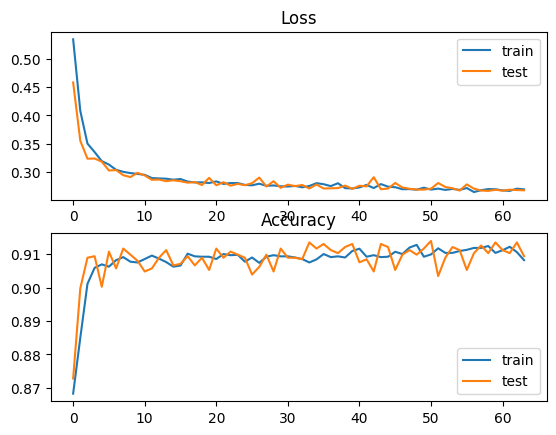

In [ ]:

# Create a neural network model
model = Sequential()
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizer,input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(layers.Dense(64,kernel_regularizer=regularizer, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(32,kernel_regularizer=regularizer, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1,kernel_regularizer=regularizer, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
print("\n")
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
pre_value =model.predict(X_train)
pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
true_value = y_train.copy()
AUC=roc_auc_score(true_value, pre_value[:,0])

print(" Train AUC is:",round(AUC,2))
print("\n")
print(" Train F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))

342/342 [==============================] - 1s 1ms/step
 Train AUC is: 0.89


 Train F1 is: 0.53


In [ ]:
pre_value =model.predict(X_test)
pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
true_value = y_test.copy()
AUC=roc_auc_score(true_value, pre_value[:,0])

print(" Test AUC is:",round(AUC,2))
print("\n")
print(" Test F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))

86/86 [==============================] - 0s 2ms/step
 Test AUC is: 0.89


 Test F1 is: 0.55


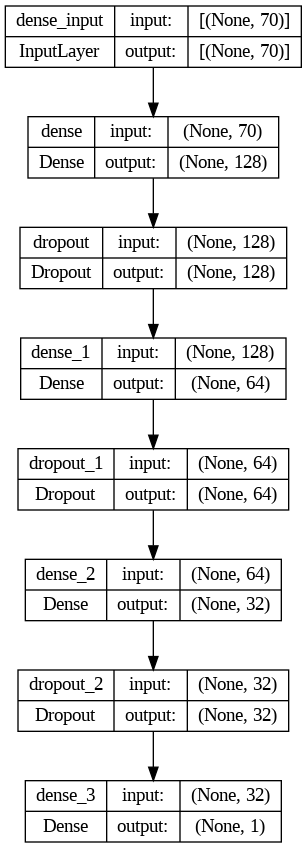

In [ ]:
# visualize the model

from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(model, to_file='MLP_model_plot.png', show_shapes=True, show_layer_names=True)

Image('MLP_model_plot.png')

In [ ]:

#inference for test
Inferences_seeds = [7,1111,1234,5678,199991,99999,3421,6642,8754,3454444]
for seed in Inferences_seeds:
  print("For seed:{}\n".format(seed))
  np.random.seed(seed) #8 #1 for betetr train,eval
  python_random.seed(seed)
  tf.random.set_seed(seed)

  pre_value = model.predict(X_test)
  pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
  AUC=roc_auc_score(true_value, pre_value[:,0])
  print("For Seed",seed," Test AUC is:",round(AUC,2))
  print("\n")
  print(" Test F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))
  # plt.plot(Y_test, 'g', label='True')
  # plt.plot(pre_value, 'b', label='Predict')
  # plt.title('test True and Predict with AUC :'+str(round(AUC,2)))
  # plt.xlabel('Time')
  # plt.ylabel('predict')
  # plt.legend()
  # plt.show()
  print("\n")

For seed:7

86/86 [==============================] - 0s 2ms/step
For Seed 7  Test AUC is: 0.89


 Test F1 is: 0.55


For seed:1111

86/86 [==============================] - 0s 2ms/step
For Seed 1111  Test AUC is: 0.89


 Test F1 is: 0.55


For seed:1234

86/86 [==============================] - 0s 2ms/step
For Seed 1234  Test AUC is: 0.89


 Test F1 is: 0.55


For seed:5678

86/86 [==============================] - 0s 2ms/step
For Seed 5678  Test AUC is: 0.89


 Test F1 is: 0.55


For seed:199991

86/86 [==============================] - 0s 2ms/step
For Seed 199991  Test AUC is: 0.89


 Test F1 is: 0.55


For seed:99999

86/86 [==============================] - 0s 3ms/step
For Seed 99999  Test AUC is: 0.89


 Test F1 is: 0.55


For seed:3421

86/86 [==============================] - 0s 2ms/step
For Seed 3421  Test AUC is: 0.89


 Test F1 is: 0.55


For seed:6642

86/86 [==============================] - 0s 2ms/step
For Seed 6642  Test AUC is: 0.89


 Test F1 is: 0.55


For seed:8754

8

In [ ]:
pickle.dump(model, open('MLP_model.pkl', 'wb'))

Defining the CNN Model

In [ ]:
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)
regularizer = L1L2(l1=0.0, l2=0.001)
optimizer = Adam(learning_rate=lr_schedule) # Adam(learning_rate=0.001)

Epoch 1/100
137/137 [==============================] - 2s 7ms/step - loss: 0.4545 - accuracy: 0.8789 - val_loss: 0.4144 - val_accuracy: 0.8732
Epoch 2/100
137/137 [==============================] - 1s 4ms/step - loss: 0.4029 - accuracy: 0.8791 - val_loss: 0.3942 - val_accuracy: 0.8732
Epoch 3/100
137/137 [==============================] - 1s 4ms/step - loss: 0.3817 - accuracy: 0.8791 - val_loss: 0.3755 - val_accuracy: 0.8732
Epoch 4/100
137/137 [==============================] - 1s 4ms/step - loss: 0.3610 - accuracy: 0.8791 - val_loss: 0.3465 - val_accuracy: 0.8732
Epoch 5/100
137/137 [==============================] - 1s 4ms/step - loss: 0.3300 - accuracy: 0.8862 - val_loss: 0.3130 - val_accuracy: 0.8915
Epoch 6/100
137/137 [==============================] - 1s 5ms/step - loss: 0.3067 - accuracy: 0.8987 - val_loss: 0.2950 - val_accuracy: 0.9034
Epoch 7/100
137/137 [==============================] - 1s 4ms/step - loss: 0.2970 - accuracy: 0.9037 - val_loss: 0.3033 - val_accuracy: 0.9093

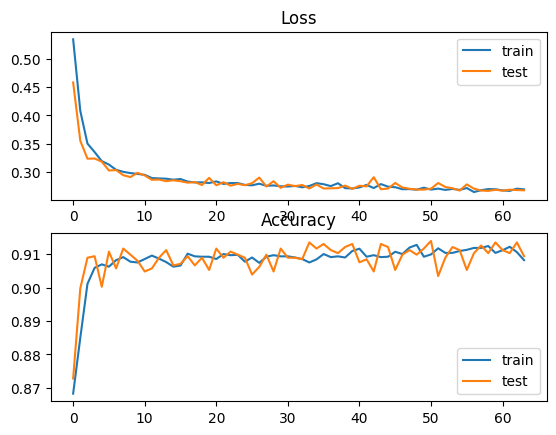

In [ ]:
# Define a function to create sliding windows for the input data
def create_sliding_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i + window_size])
    return np.array(windows)

# Set the sliding window size
window_size = 5

# Create sliding windows for the input data
X_train_windows = np.array([create_sliding_windows(X_train[:, i], window_size) for i in range(X_train.shape[1])]).transpose(1, 2, 0)
X_test_windows = np.array([create_sliding_windows(X_test[:, i], window_size) for i in range(X_test.shape[1])]).transpose(1, 2, 0)

# Set the input shape
time_steps = window_size
input_dim = X_train_windows.shape[2]

# Create a 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=regularizer, input_shape=(time_steps, input_dim)))
model.add(Flatten())
model.add(layers.Dense(32, activation='relu',kernel_regularizer=regularizer))
model.add(Dropout(0.2))
model.add(layers.Dense(1,kernel_regularizer=regularizer, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train_windows, y_train[:len(X_train_windows)], epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_windows, y_test[:len(X_test_windows)])
print(f'Test accuracy: {test_acc}')
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
pre_value =model.predict(X_train_windows)
pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
true_value = y_train[:len(X_train_windows)].copy()
AUC=roc_auc_score(true_value, pre_value[:,0])

print(" Train AUC is:",round(AUC,2))
print("\n")
print(" Train F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))

342/342 [==============================] - 1s 2ms/step
 Train AUC is: 0.88


 Train F1 is: 0.51


In [ ]:
pre_value =model.predict(X_test_windows)
pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
true_value = y_test[:len(X_test_windows)].copy().copy()
AUC=roc_auc_score(true_value, pre_value[:,0])

print(" Test AUC is:",round(AUC,2))
print("\n")
print(" Test F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))

86/86 [==============================] - 0s 2ms/step
 Test AUC is: 0.87


 Test F1 is: 0.5


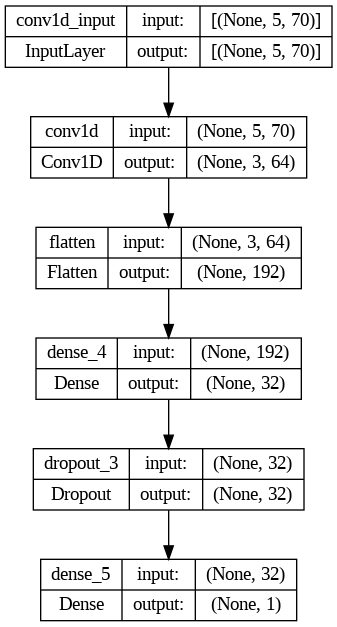

In [ ]:
# visualize the model

from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True)

Image('CNN_model_plot.png')

In [ ]:

#inference for test
Inferences_seeds = [7,1111,1234,5678,199991,99999,3421,6642,8754,3454444]
for seed in Inferences_seeds:
  print("For seed:{}\n".format(seed))
  np.random.seed(seed) #8 #1 for betetr train,eval
  python_random.seed(seed)
  tf.random.set_seed(seed)

  pre_value = model.predict(X_test_windows)
  pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
  AUC=roc_auc_score(true_value, pre_value[:,0])
  print("For Seed",seed," Test AUC is:",round(AUC,2))
  print("\n")
  print(" Test F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))
  # plt.plot(Y_test, 'g', label='True')
  # plt.plot(pre_value, 'b', label='Predict')
  # plt.title('test True and Predict with AUC :'+str(round(AUC,2)))
  # plt.xlabel('Time')
  # plt.ylabel('predict')
  # plt.legend()
  # plt.show()
  print("\n")

For seed:7

86/86 [==============================] - 0s 2ms/step
For Seed 7  Test AUC is: 0.87


 Test F1 is: 0.5


For seed:1111

86/86 [==============================] - 0s 2ms/step
For Seed 1111  Test AUC is: 0.87


 Test F1 is: 0.5


For seed:1234

86/86 [==============================] - 0s 2ms/step
For Seed 1234  Test AUC is: 0.87


 Test F1 is: 0.5


For seed:5678

86/86 [==============================] - 0s 2ms/step
For Seed 5678  Test AUC is: 0.87


 Test F1 is: 0.5


For seed:199991

86/86 [==============================] - 0s 2ms/step
For Seed 199991  Test AUC is: 0.87


 Test F1 is: 0.5


For seed:99999

86/86 [==============================] - 0s 3ms/step
For Seed 99999  Test AUC is: 0.87


 Test F1 is: 0.5


For seed:3421

86/86 [==============================] - 0s 2ms/step
For Seed 3421  Test AUC is: 0.87


 Test F1 is: 0.5


For seed:6642

86/86 [==============================] - 0s 2ms/step
For Seed 6642  Test AUC is: 0.87


 Test F1 is: 0.5


For seed:8754

86/86 [==

In [ ]:
pickle.dump(model, open('CNN_model.pkl', 'wb'))

Defining the LSTM Model

In [ ]:
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)
regularizer = L1L2(l1=0.0, l2=0.001)
optimizer = Adam(learning_rate=lr_schedule) # Adam(learning_rate=0.001)

Epoch 1/100
137/137 [==============================] - 4s 11ms/step - loss: 0.4818 - accuracy: 0.8695 - val_loss: 0.4303 - val_accuracy: 0.8732
Epoch 2/100
137/137 [==============================] - 1s 8ms/step - loss: 0.3940 - accuracy: 0.8811 - val_loss: 0.3588 - val_accuracy: 0.8878
Epoch 3/100
137/137 [==============================] - 1s 8ms/step - loss: 0.3139 - accuracy: 0.9008 - val_loss: 0.2927 - val_accuracy: 0.9025
Epoch 4/100
137/137 [==============================] - 1s 8ms/step - loss: 0.3002 - accuracy: 0.9048 - val_loss: 0.2903 - val_accuracy: 0.9034
Epoch 5/100
137/137 [==============================] - 1s 8ms/step - loss: 0.2874 - accuracy: 0.9075 - val_loss: 0.2835 - val_accuracy: 0.9025
Epoch 6/100
137/137 [==============================] - 1s 8ms/step - loss: 0.2793 - accuracy: 0.9071 - val_loss: 0.2947 - val_accuracy: 0.8993
Epoch 7/100
137/137 [==============================] - 2s 11ms/step - loss: 0.2771 - accuracy: 0.9078 - val_loss: 0.2866 - val_accuracy: 0.90

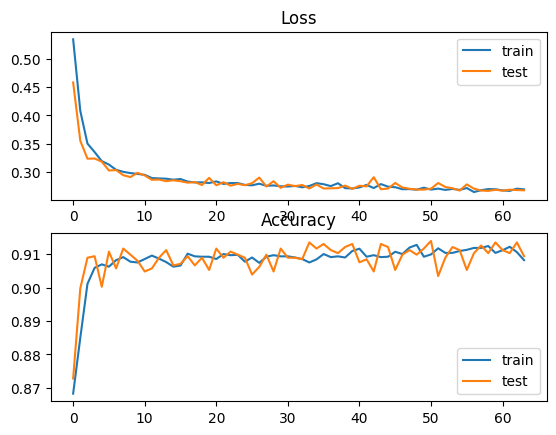

In [ ]:
def create_sliding_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i + window_size])
    return np.array(windows)

# Set the sliding window size
window_size = 5

# Create sliding windows for the input data
X_train_windows = np.array([create_sliding_windows(X_train[:, i], window_size) for i in range(X_train.shape[1])]).transpose(1, 2, 0)
X_test_windows = np.array([create_sliding_windows(X_test[:, i], window_size) for i in range(X_test.shape[1])]).transpose(1, 2, 0)

# Set the input shape
time_steps = window_size
input_dim = X_train_windows.shape[2]

# Create an LSTM model
model =Sequential()
model.add(LSTM(units=64, activation='relu', kernel_regularizer=regularizer,input_shape=(time_steps, input_dim)))
model.add(layers.Dense(32,kernel_regularizer=regularizer, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1,kernel_regularizer=regularizer, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
model.fit(X_train_windows, y_train[:len(X_train_windows)], epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_windows, y_test[:len(X_test_windows)])
print(f'Test accuracy: {test_acc}')
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
pre_value =model.predict(X_train_windows)
pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
true_value = y_train[:len(X_train_windows)].copy()
AUC=roc_auc_score(true_value, pre_value[:,0])
print(" Train AUC is:",round(AUC,2))
print("\n")
print(" Train F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))

In [ ]:
pre_value =model.predict(X_test_windows)
pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
true_value = y_test[:len(X_test_windows)].copy().copy()
AUC=roc_auc_score(true_value, pre_value[:,0])

print(" Test AUC is:",round(AUC,2))
print("\n")
print(" Test F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))

86/86 [==============================] - 0s 3ms/step
 Test AUC is: 0.88


 Test F1 is: 0.55


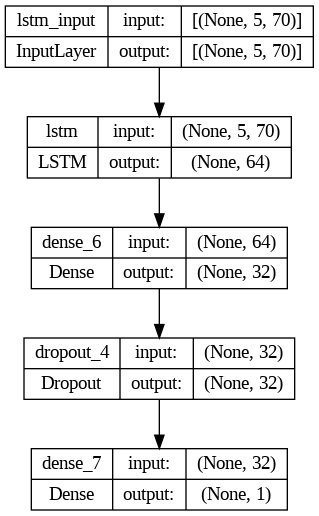

In [ ]:
# visualize the model

from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(model, to_file='lstm_model_plot.png', show_shapes=True, show_layer_names=True)

Image('lstm_model_plot.png')

In [ ]:

#inference for test
Inferences_seeds = [7,1111,1234,5678,199991,99999,3421,6642,8754,3454444]
for seed in Inferences_seeds:
  print("For seed:{}\n".format(seed))
  np.random.seed(seed) #8 #1 for betetr train,eval
  python_random.seed(seed)
  tf.random.set_seed(seed)

  pre_value = model.predict(X_test_windows)
  pre_value_prob = np.where(pre_value >= 0.5, 1, 0).flatten()
  AUC=roc_auc_score(true_value, pre_value[:,0])
  print("For Seed",seed," Test AUC is:",round(AUC,2))
  print("\n")
  print(" Test F1 is:",round(f1_score(true_value, pre_value_prob, average='binary'),2))
  # plt.plot(Y_test, 'g', label='True')
  # plt.plot(pre_value, 'b', label='Predict')
  # plt.title('test True and Predict with AUC :'+str(round(AUC,2)))
  # plt.xlabel('Time')
  # plt.ylabel('predict')
  # plt.legend()
  # plt.show()
  print("\n")

For seed:7

86/86 [==============================] - 0s 3ms/step
For Seed 7  Test AUC is: 0.88


 Test F1 is: 0.55


For seed:1111

86/86 [==============================] - 0s 2ms/step
For Seed 1111  Test AUC is: 0.88


 Test F1 is: 0.55


For seed:1234

86/86 [==============================] - 0s 3ms/step
For Seed 1234  Test AUC is: 0.88


 Test F1 is: 0.55


For seed:5678

86/86 [==============================] - 0s 2ms/step
For Seed 5678  Test AUC is: 0.88


 Test F1 is: 0.55


For seed:199991

86/86 [==============================] - 0s 3ms/step
For Seed 199991  Test AUC is: 0.88


 Test F1 is: 0.55


For seed:99999

86/86 [==============================] - 0s 3ms/step
For Seed 99999  Test AUC is: 0.88


 Test F1 is: 0.55


For seed:3421

86/86 [==============================] - 0s 3ms/step
For Seed 3421  Test AUC is: 0.88


 Test F1 is: 0.55


For seed:6642

86/86 [==============================] - 0s 2ms/step
For Seed 6642  Test AUC is: 0.88


 Test F1 is: 0.55


For seed:8754

8

In [ ]:
pickle.dump(model, open('LSTM_model.pkl', 'wb'))